In [1]:
# DATA ANALYTICS PROJECT                                                  SUBMITTED BY KUMAR AMIT Mtech 2K22/IEM/07



# TOPIC : Mall Customer Segmentation using K-Means Clustering 


#Problem Statement
#       You own the mall and want to understand the customers like who can be easily converted [Target Customers] 
#       so that the sense can be given to marketing team and plan the strategy accordingly.


In [2]:
#CONTENT

#    You are owing a supermarket mall and through membership cards , 
#    you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
#    Spending Score is something you assign to the customer based 
#    on your defined parameters like customer behavior and purchasing data.

In [3]:
#Mathematical Formulas
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

#data visualization
import matplotlib.pyplot as plt 

import seaborn as sns 

#clustering
from sklearn.cluster import KMeans

In [4]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [5]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Understanding the data

In [38]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [8]:
# This dataset is containing 200 records with 5 features. 
# Our objective is to categorize the customers based on annual income and spending score.

In [9]:
# getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# The dataset has 2 data types, int64 & object. 
# There is no null values on the dataset. 


In [12]:
### Summary statistics of the numerical columns in the dataset

customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# Next, we can show the relation between Annual Income and Spending Score by using scatterplot.

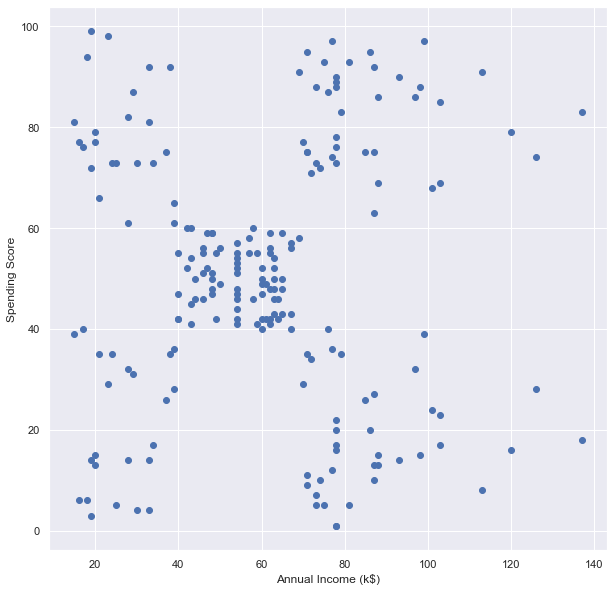

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x=customer_data['Annual Income (k$)'], y=customer_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [15]:
 # At a glance, we will see 5 patterns on the graph. They are Top-Left, Top-Right, Center, Bottom-Left, Bottom-Right. 
 # Next, we separate this patterns using KMeans Clustering algorithm.

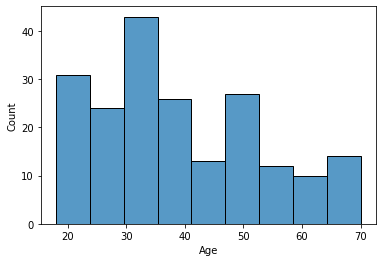

In [16]:
sns.histplot(customer_data['Age'])
plt.show()

In [17]:
# Another investigation, most of customers are in range 30-40 years old. 
# Next step, we will declare the 'X' with annual income and spending score.

In [18]:
#Choosing the Annual Income Column & Spending Score column

In [19]:
X = customer_data.iloc[:,[3,4]].values

In [20]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [21]:
#Choosing the number of clusters

#WCSS -> Within Clusters Sum of Squares

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

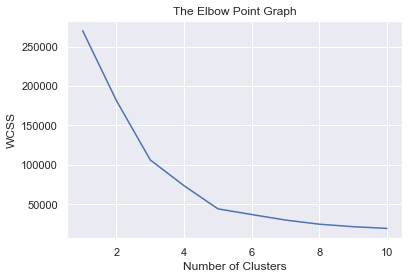

In [24]:
# plotting an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
#Optimum Number of Clusters = 5
#According to the curve, we can determine the optimal k value by looking which curve that move more horizontally. 
#In this case we got from point 5. 

#By elbow method, we can determine the best value for K while using KMeans clustering.


In [26]:
#Training the k-Means Clustering Model

In [35]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [28]:
# 5 Clusters - 0, 1, 2, 3, 4 

In [29]:
#Visualizing all the Clusters

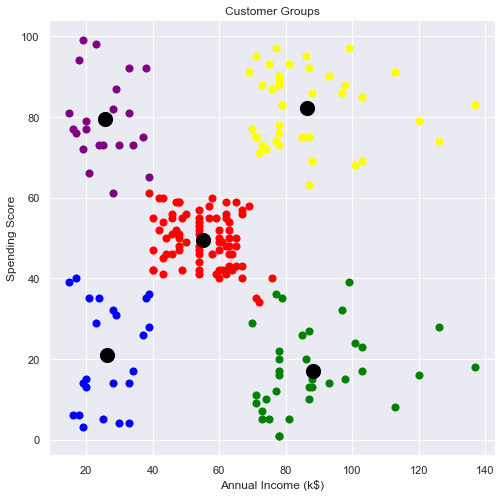

In [40]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='purple')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', )

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [31]:
#CONCLUSION


#Now, we can see the different cluster clearly.

#The definition of each cluster will be explained below:



#Purple Cluster: The customers who have low income and spend much money. We can assume this is the unbalance cluster.
#these are those people who for some reason love to buy products more often even though they have a low income. 
#Maybe it’s because these people are more than satisfied with the mall services. 
#The shops/malls might not target these people that effectively but still will not lose them.


#Yellow Cluster: The customers who have high income and spend much money. We can assume this is the rich guy cluster.
#this is the ideal case for the mall or shops as these people are the prime sources of profit. 
#These people might be the regular customers of the mall and are convinced by the mall’s facilities.


#Red Cluster: The customers who have middle income and spend not so much and not so less money. 
#We can assume this is the balance cluster.
#these people again will not be the prime targets of the shops or mall, 
#but again they will be considered and other data analysis techniques may be used to increase their spending score.



#Blue Cluster: The customers who have low income and spend less money. this is quite reasonable as people having low salaries 
#prefer to buy 
#less, in fact, these are the wise people who know how to spend and save money. 
#The shops/mall will be least interested in people belonging to this cluster.


#Green Cluster: The customers who have high income and spend less money. 
#We can assume this is the 'don't like shopping' cluster
#Maybe these are the people who are unsatisfied or unhappy by the mall’s services. 
#These can be the prime targets of the mall, as they have the potential to spend money. 
#So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.




#   to increase the profits of the mall, the mall authorities should target people belonging to cluster GREEN and cluster RED 
#   and should also maintain its standards to keep the people belonging to cluster YELLOW and cluster PURPLE happy and satisfied.